# CLT data prepration

In [200]:
import pandas as pd

In [201]:
titanic_data1= pd.read_csv(r'F:\Github_dsc\HousePrice_MegaProject\1. data_gathering\cx_data\experiment_data\train.csv')
titanic_data2= pd.read_csv(r'F:\Github_dsc\HousePrice_MegaProject\1. data_gathering\cx_data\experiment_data\test.csv')

In [202]:
titanic_data1.sample(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.55,C52,S


In [203]:
titanic_data2.sample(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
406,1298,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5,NaN,S


In [204]:
titanic_data2['Survived']=None

In [205]:
titanic_data1.shape, titanic_data2.shape

((891, 12), (418, 12))

In [206]:
titanic_data = pd.concat([titanic_data1, titanic_data2], axis=0, ignore_index=True)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,None,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,None,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,None,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,None,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [207]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

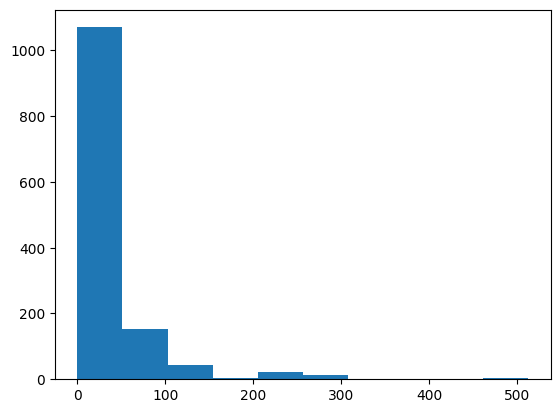

In [208]:
import random
import matplotlib.pyplot as plt

plt.hist(titanic_data['Fare'])
plt.show()
# fare col not normally distributed

# CLT testing starts

In [209]:
import numpy as np

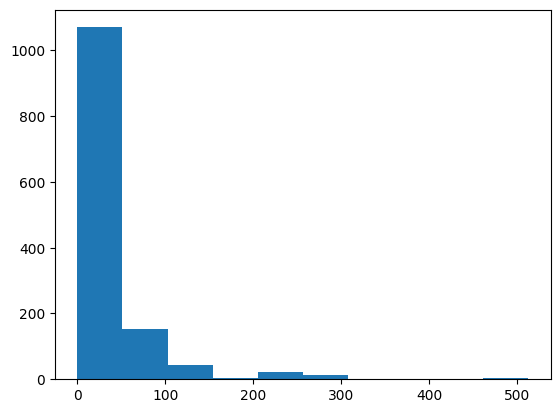

In [210]:
pop_data = titanic_data['Fare']
plt.hist(pop_data)
plt.show()

<Axes: xlabel='Fare', ylabel='Density'>

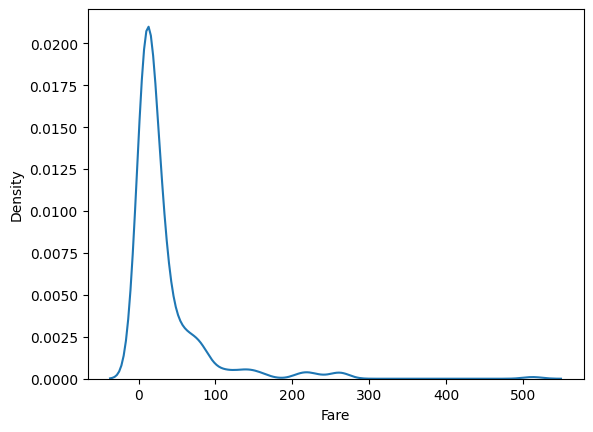

In [211]:
import seaborn as sns 
sns.kdeplot(pop_data)

In [212]:
pop_data[(pop_data>200) & (pop_data<300)].shape

(34,)

In [213]:
singel_sample_data = pop_data.sample(n=1000)
singel_sample_data.shape

# singel_sample_data = pop_data[(pop_data>200) & (pop_data<300)].sample(n=15)
# singel_sample_data.shape

(1000,)

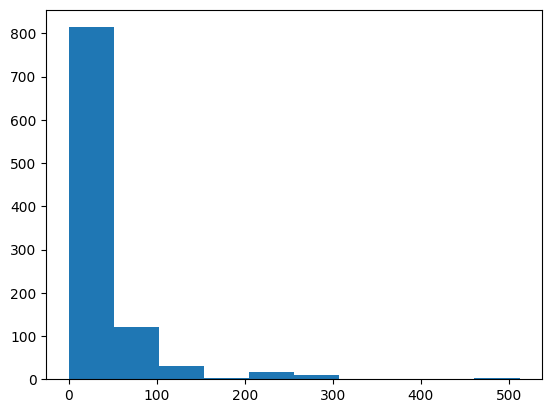

In [214]:
plt.hist(singel_sample_data)
plt.show()

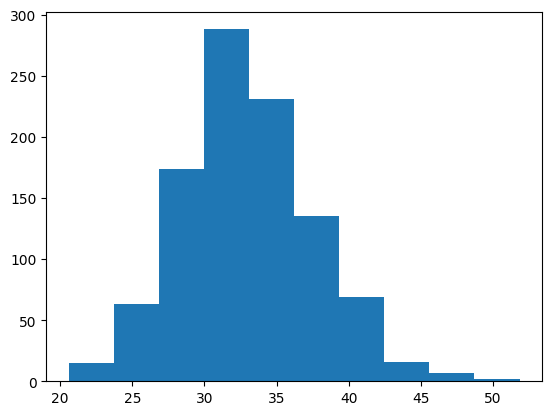

In [215]:
samples=[]

for i in range(1000):
    samples.append(singel_sample_data.sample(n=100).mean())
plt.hist(samples)
plt.show()

<Axes: xlabel='Fare', ylabel='Density'>

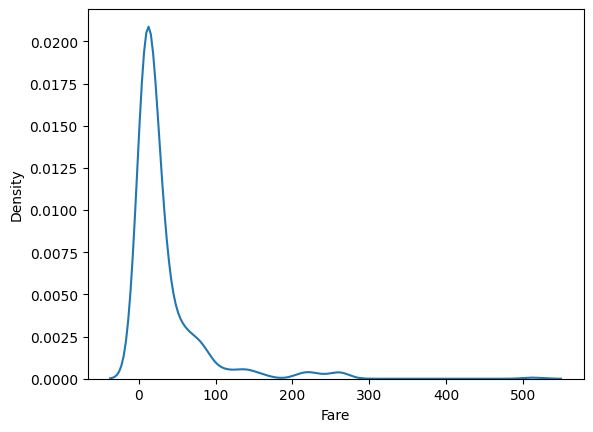

In [216]:
import seaborn as sns 
sns.kdeplot(singel_sample_data)

In [217]:
pd.Series(samples).mean(), pop_data.mean()

(32.961863137555554, 33.29547928134557)

In [218]:
pd.Series(samples).std(), pop_data.std()

(4.59092030517362, 51.75866823917411)

# using pop

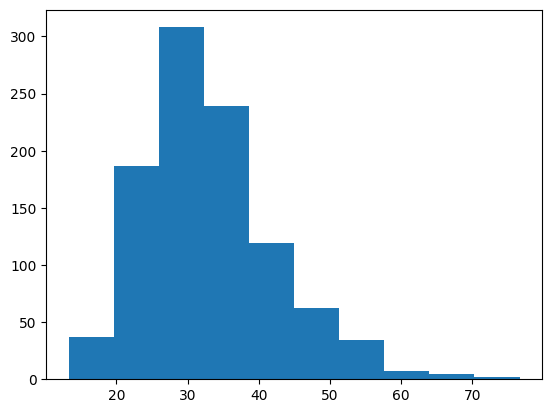

In [219]:
samples=[]

for i in range(1000):
    samples.append(pop_data.sample(n=30).mean())
plt.hist(samples)
plt.show()

In [220]:
pd.Series(samples).mean(), pop_data.mean()

(33.05982401068965, 33.29547928134557)

In [ ]:
# this proves that when we take sample_dist from pop directly the estimate of stats is more accurate, 
# compared to sample_dist taken from single_representative_sample taken from pop

In [ ]:
# so this proves that sampling of 1000 samples of min 30 size directly from pop is almost equalent to picking 100 samples of min 30 size from a single_representative_sample taken from pop which is real time case when we work on a dataset in industry or kaggle,
# becoz we only have single representative_sample_data when we get a dataset to work on. 